# UNSUPERVISED ML(HIERARCHICAL CLUSTERING) - INSURANCE MARKET SEGMENTATION DATA

## Introduction

- Hierarchical clustering is a popular method in the field of data analysis and unsupervised machine learning. 
- It is a technique used to group similar data points into clusters or hierarchical structures based on their similarity or dissimilarity.
- Hierarchical clustering is particularly useful when you want to explore and visualize the natural grouping of data points without specifying the number of clusters beforehand.

## Working Process

Here's how the Hierarchical clustering algorithm works:-
- Initialization
- Similarity Calculation
- Cluster Merging
- Dendrogram Creation
- Dendrogram Visualization
- Cluster Assignments
- Result Interpretation

## Topic Name

### Insurance Market Segmentation Data

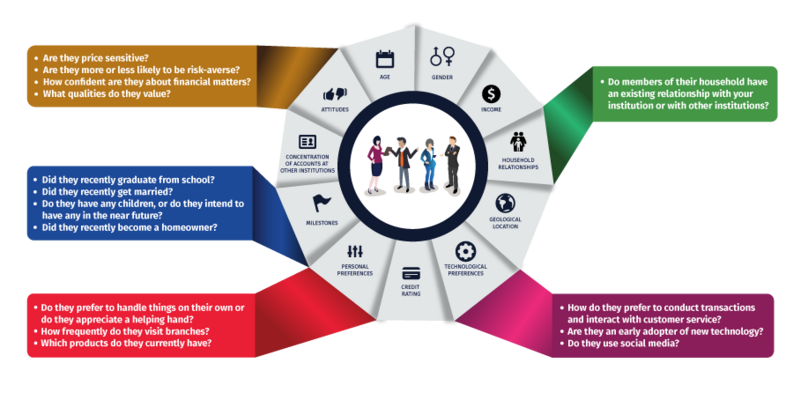

## What is Market Segmentation

- In marketing, market segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into subgroups of consumers based on some type of shared characteristics.
- The primary goal of market segmentation is to identify and understand distinct groups within a larger market so that businesses can tailor their marketing efforts to better meet the specific needs and preferences of each segment.
- This approach allows companies to be more effective in their marketing and product development efforts, ultimately leading to increased sales and customer satisfaction. 

## Objective of dataset

- Clustering the customers or developing a customer segmentation on the given attributes to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.
- We'll do this Clustering process using Hierarchical Algorithm

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Documents\Customer Data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.duplicated().sum()

0

## DATA PRE~PROCESSING

### (1) Null/Missing Values check & treatment

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
#Checking for Missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

- Null values detected in ['CREDIT_LIMIT'] & ['MINIMUM_PAYMENTS']

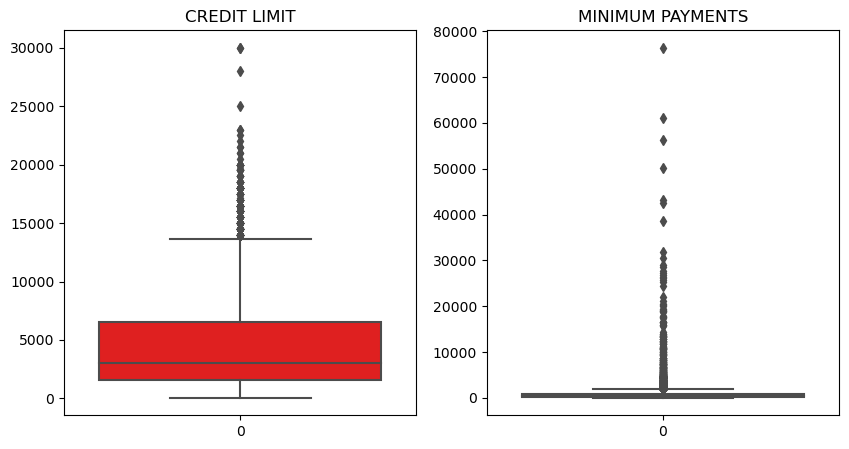

In [10]:
#Plotting boxplot to check whether to treat null values with Mean or Median
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df['CREDIT_LIMIT'],color='red')
plt.title('CREDIT LIMIT')

plt.subplot(1,2,2)
sns.boxplot(df['MINIMUM_PAYMENTS'],color='red')
plt.title('MINIMUM PAYMENTS')
plt.show()

In [11]:
#Treating them with Median method (as outliers detected)
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- As we can see all missing values are treated

### Heatmap Visualization

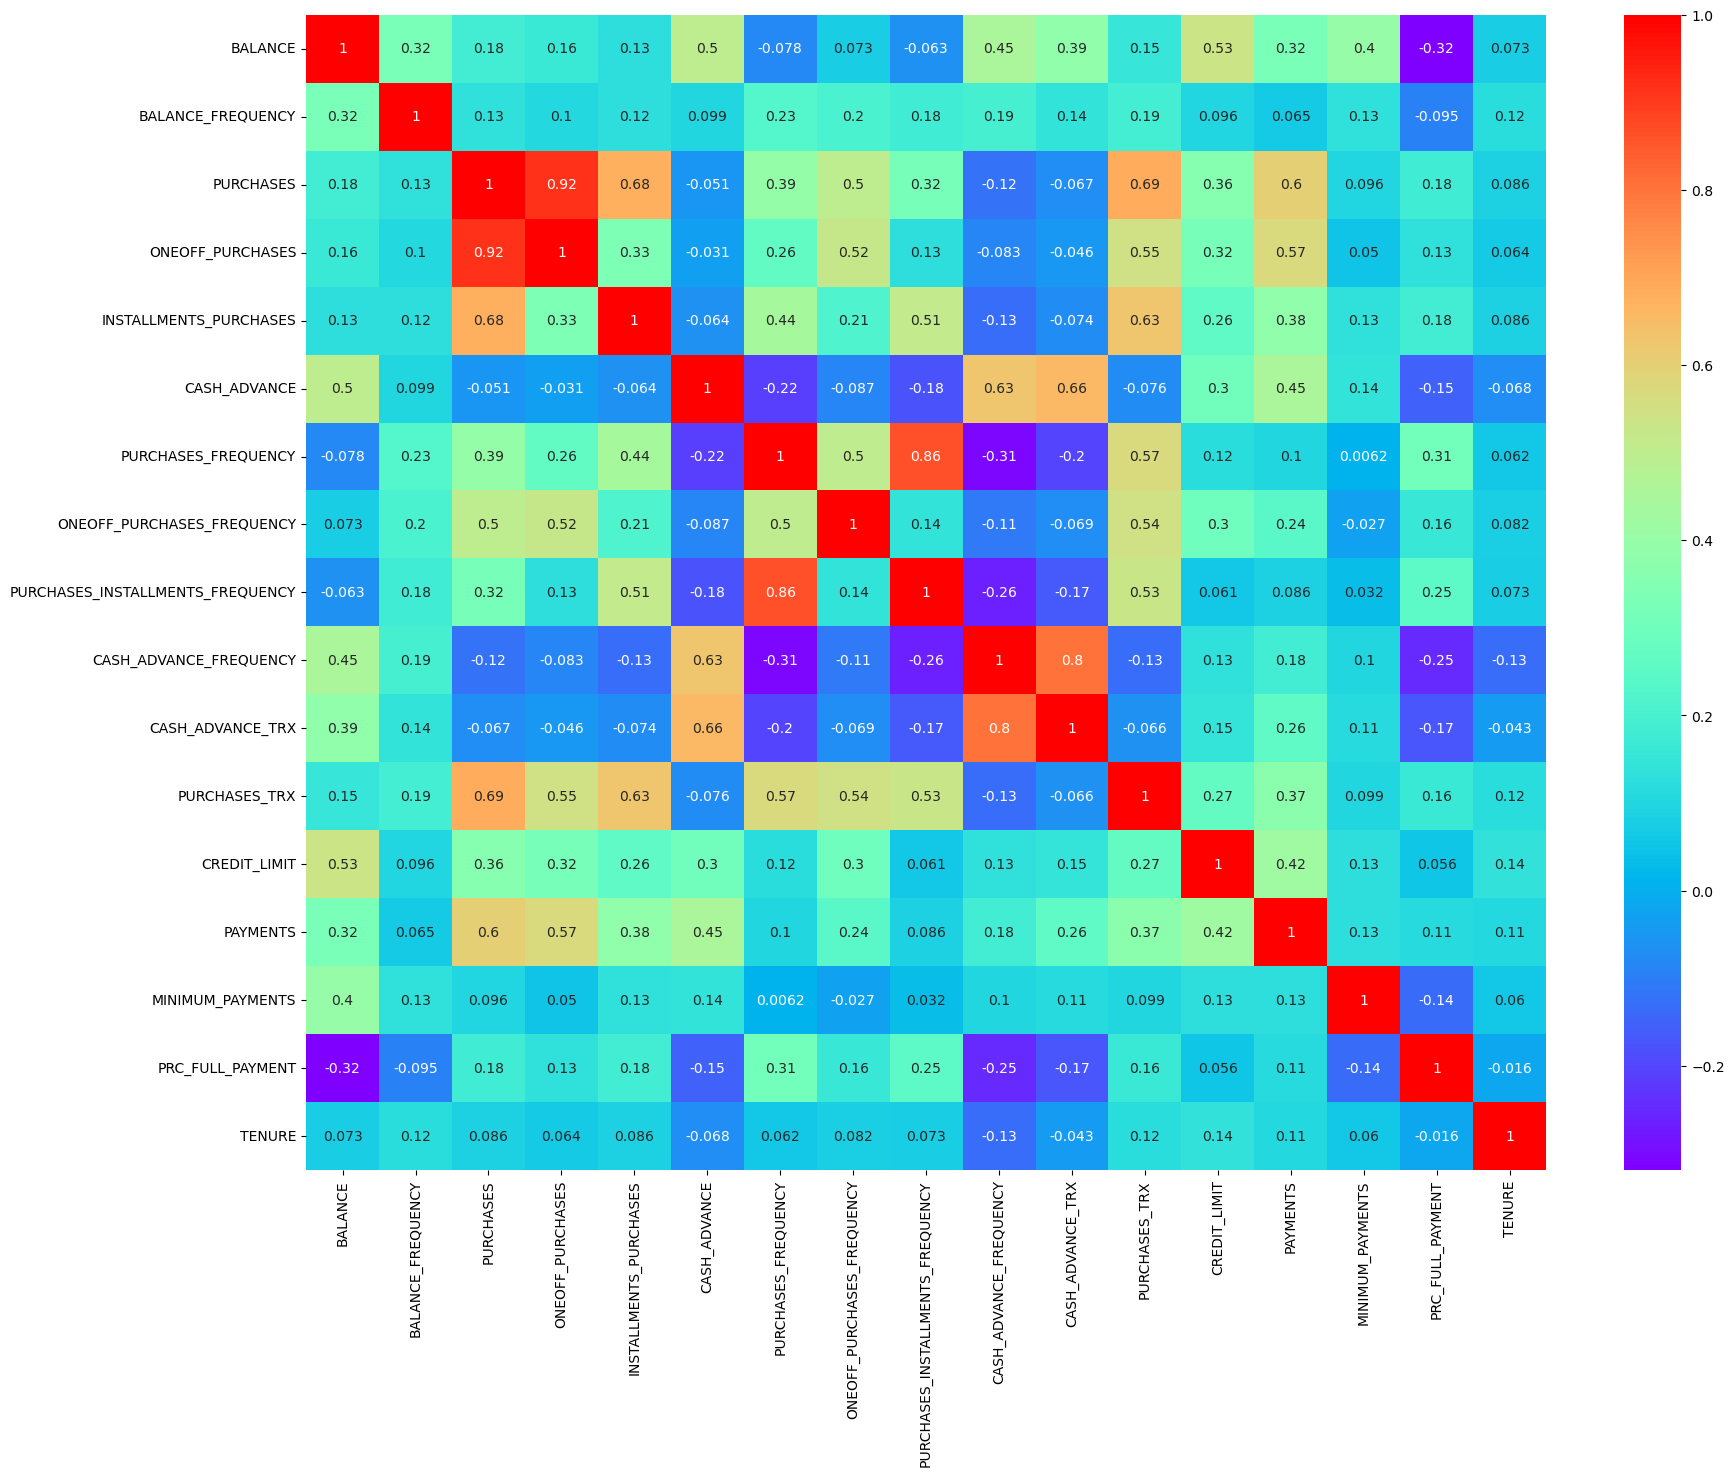

In [13]:
plt.figure(figsize=(20,15))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='rainbow')
plt.show()

### Barplot Visualization

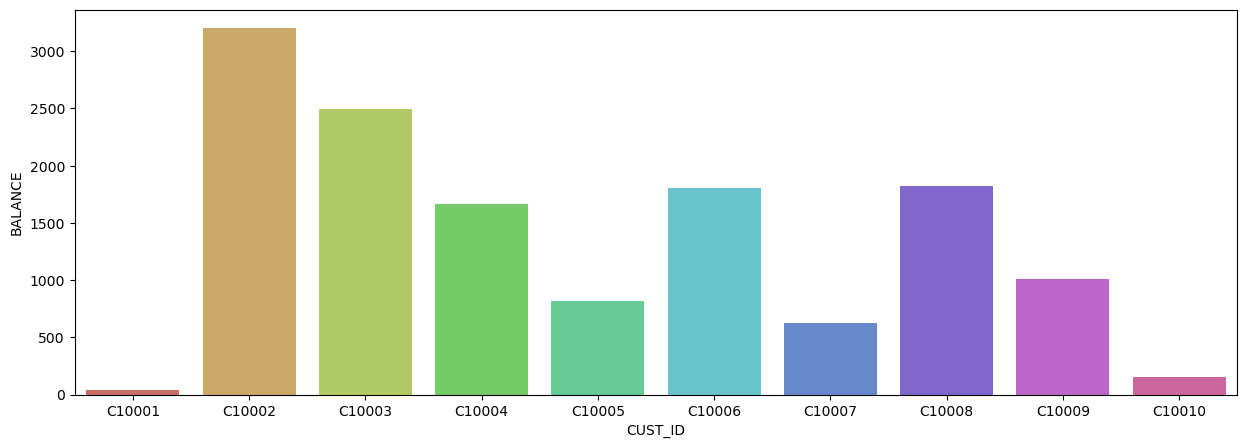

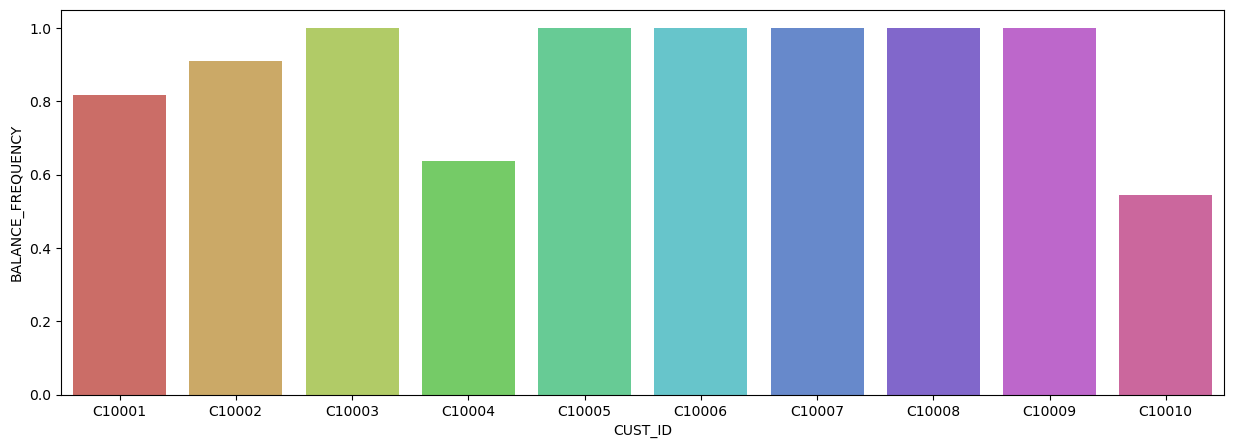

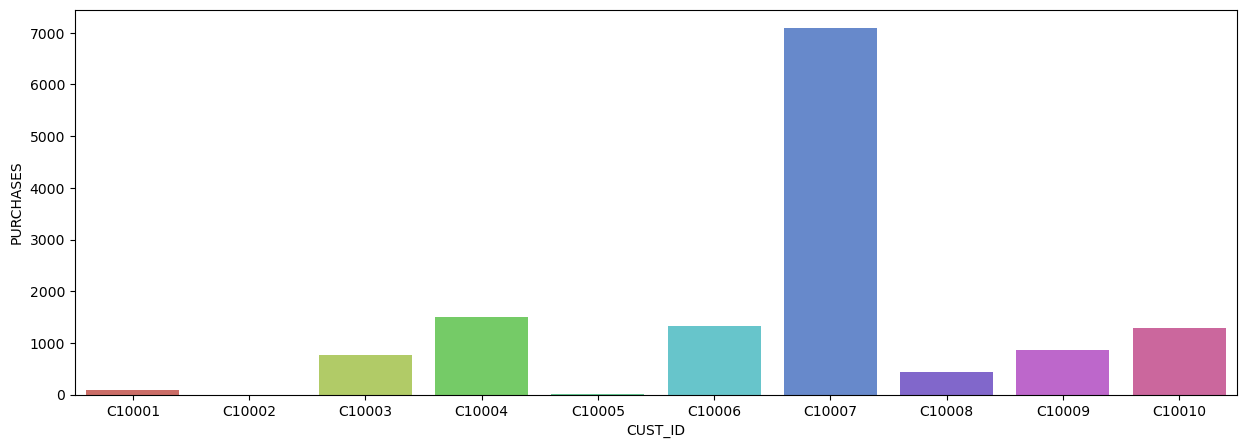

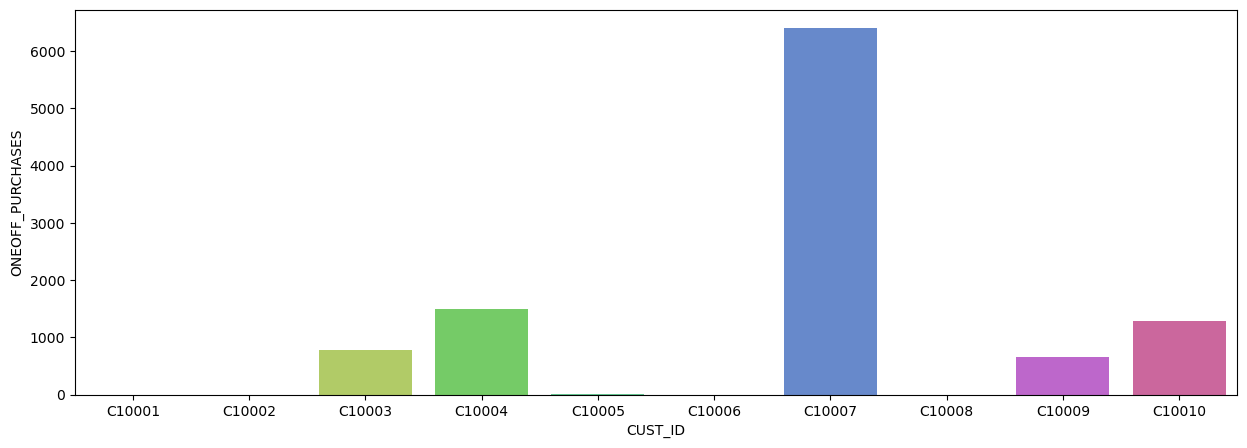

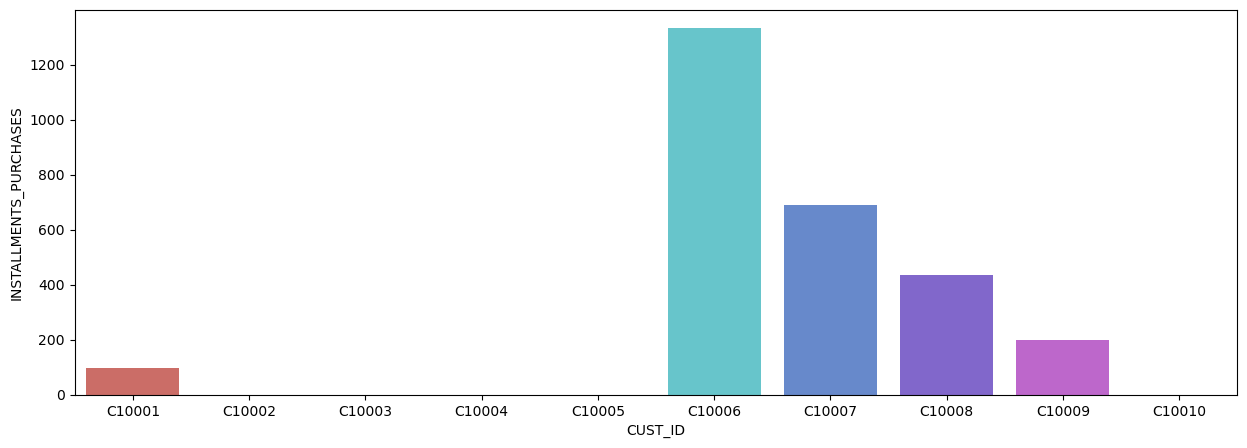

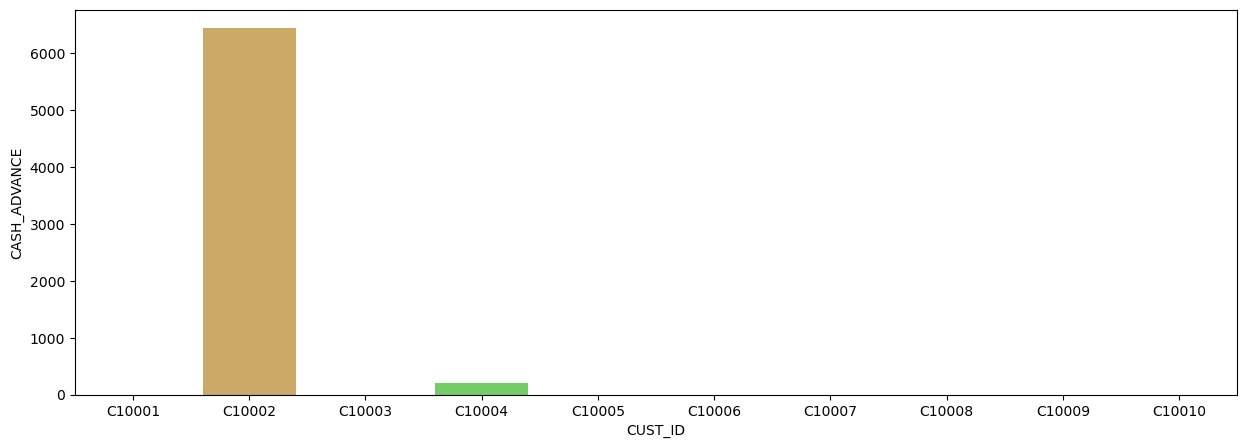

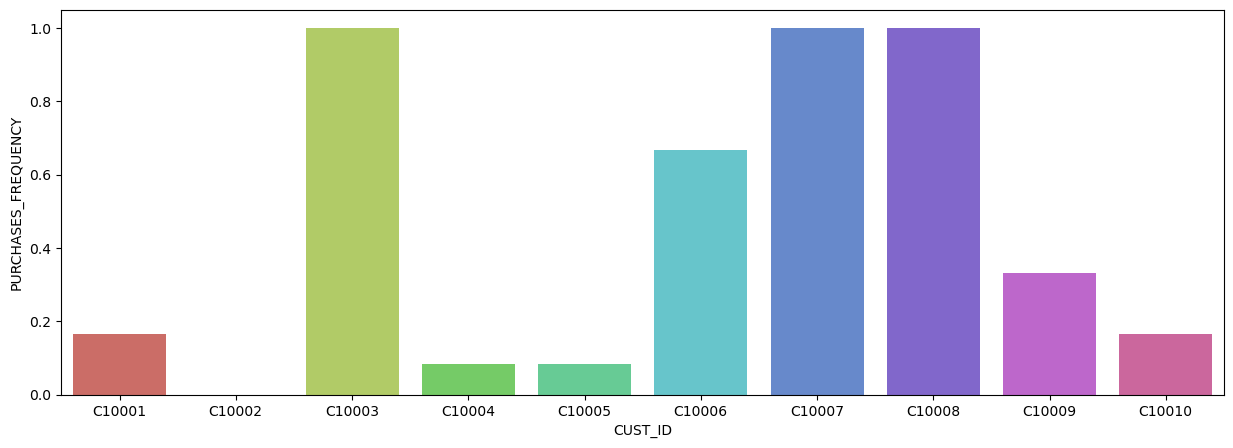

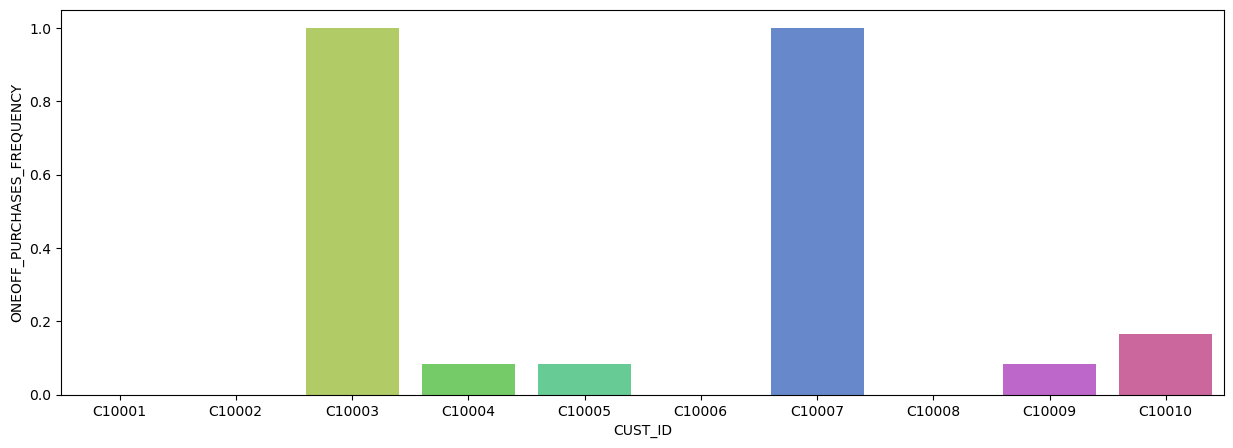

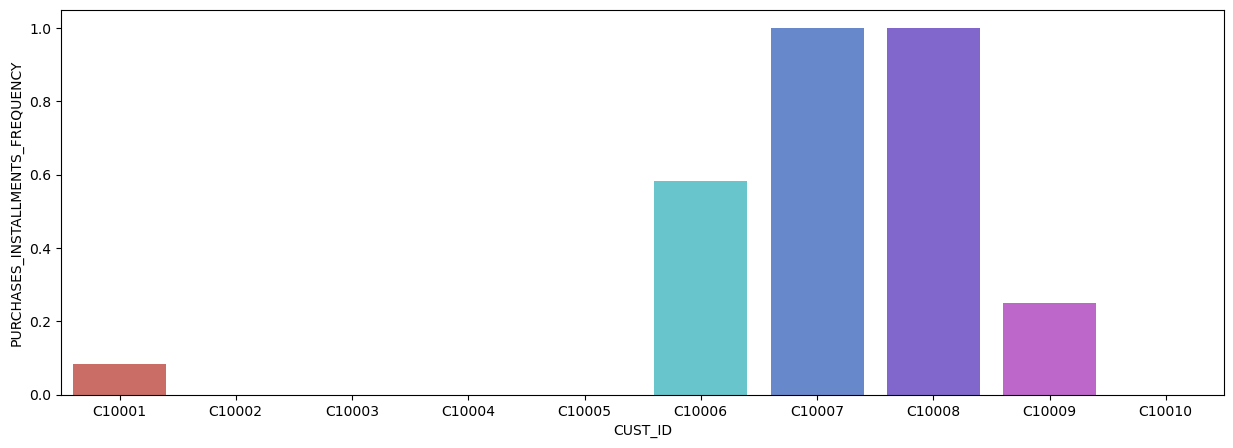

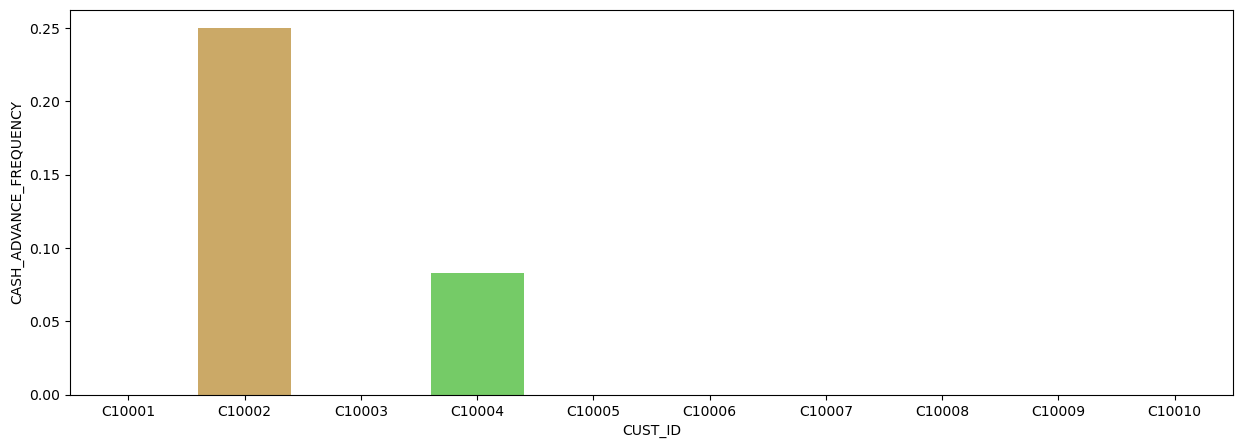

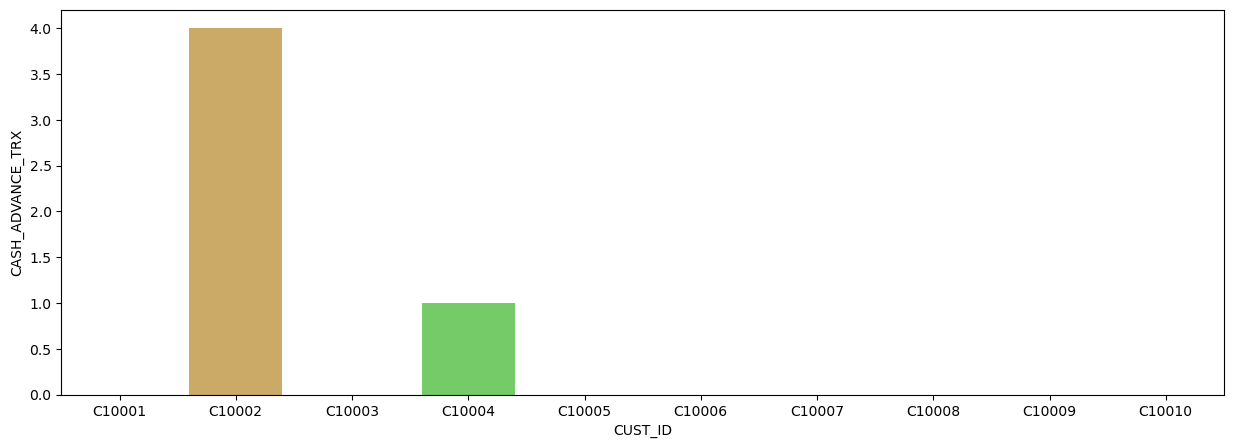

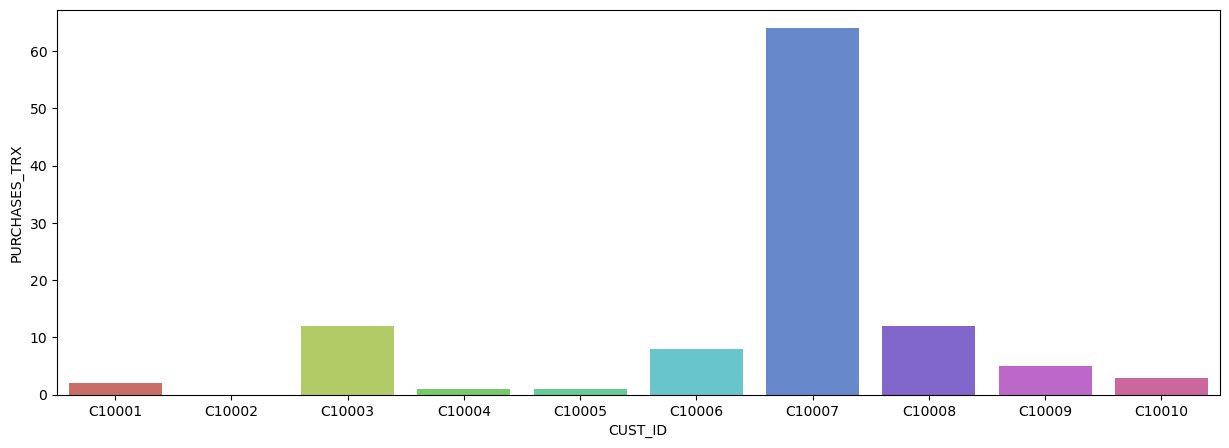

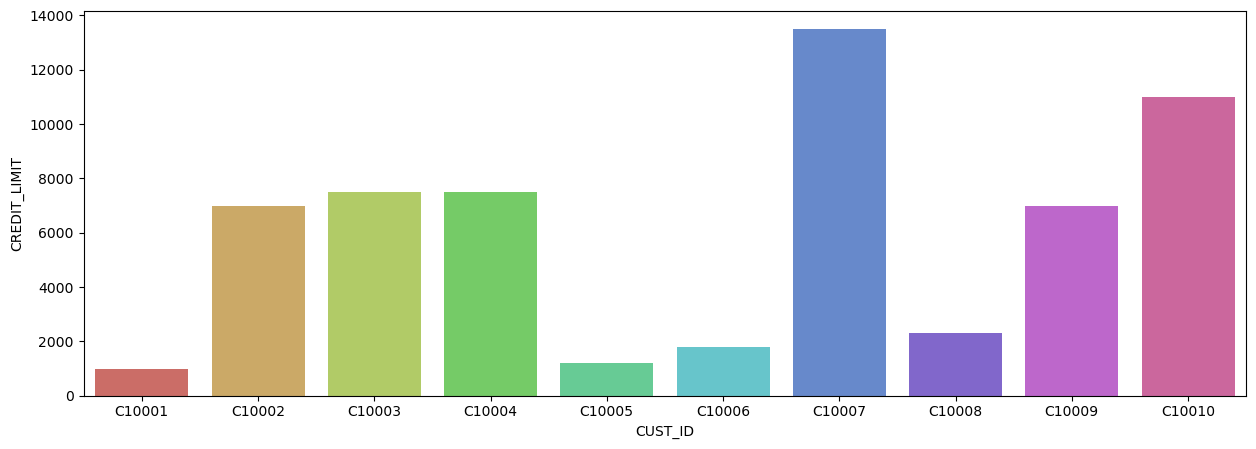

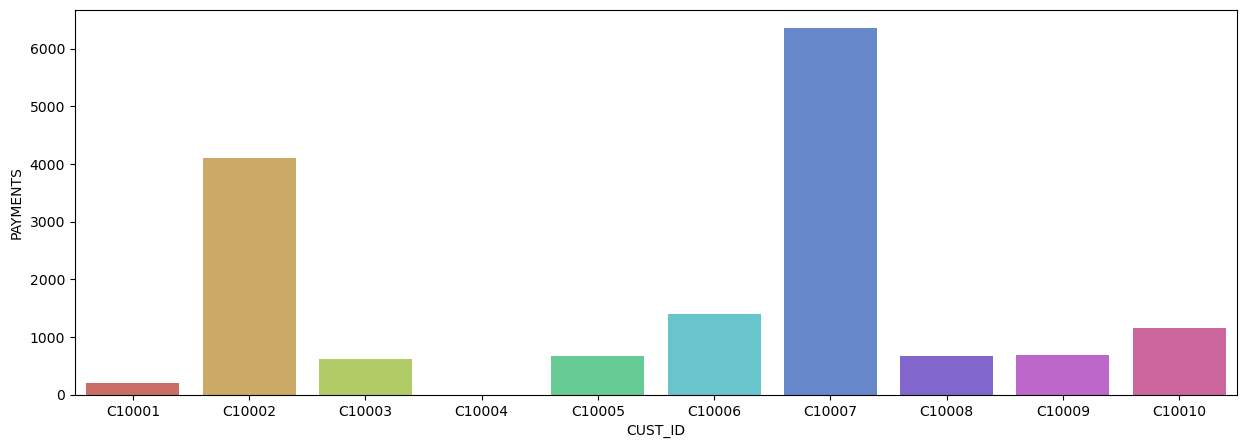

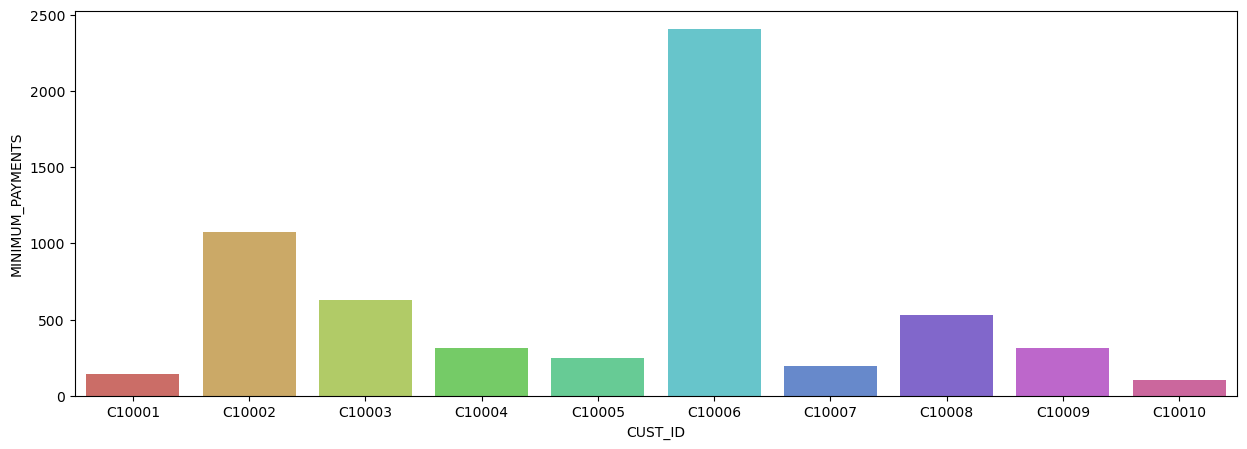

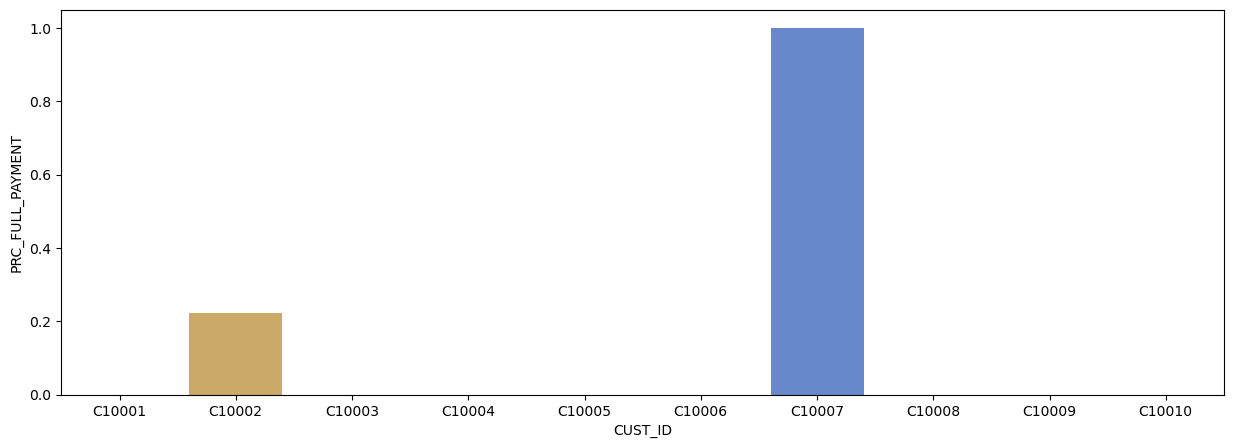

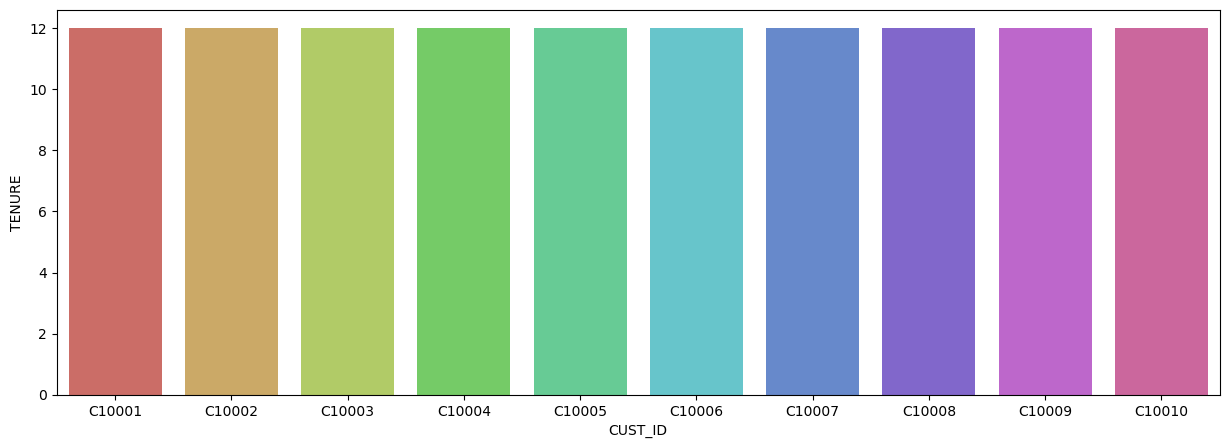

In [14]:
def barplots(x_col,y_col):
    plt.figure(figsize=(15,5))
    sns.barplot(df.head(10),x=x_col,y=y_col,palette='hls')
    plt.show()
    
for i in df.columns:
    if i!='CUST_ID':
        barplots('CUST_ID',i)

## Clustering/Grouping the customers on basis of all their attributes (except their CUST_ID)

### Reasons for not considering the CUST_ID

- As our goal is to segment customers based on their insurance-related behaviors, demographics, or other measurable attributes, so no need of including the Customer ID in clustering as it may not be directly relevant to the analysis
- Including Customer ID in the clustering process can add a high-dimensional categorical variable to your dataset which can complicate the analysis and potentially lead to poor clustering results.
- Including Customer ID might not contribute to capturing the underlying patterns and could even introduce noise.

In [15]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
x=df.iloc[:,1:]
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Feature Scaling

- Feature scaling is only performed on independent variables
- Now we have to scale the above data by feature scaling as scaled data will be beneficial for further process

In [17]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
fs_x=std.fit_transform(x)
pd.DataFrame(fs_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


In [18]:
fs_x

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

### PCA-Principal Component Analysis

In [19]:
from sklearn.decomposition import PCA
pca=PCA()
pca_x=pca.fit_transform(fs_x)
pd.DataFrame(pca_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196,-0.235948,-0.052497,-0.081637,-0.187992,0.149962,0.048266,-0.000161
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929,-0.870746,-0.607171,-0.034550,-0.733098,-0.532951,-0.082909,0.000003
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744,-0.762170,0.683870,0.696544,0.042389,0.221683,0.511325,0.000022
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690,0.747670,0.119186,-0.127887,-0.417356,-0.091930,-0.016174,-0.000010
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073,-0.455167,-0.108719,-0.037507,-0.040989,0.290908,-0.070603,-0.000081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.362572,-2.013437,-0.975609,-2.742418,0.124714,2.673427,-1.561393,0.277404,1.371131,-0.845167,0.194939,0.020982,-0.078284,0.120858,0.466458,0.157827,-0.000173
8946,-0.580810,-1.675663,-1.222354,-1.980537,-0.073504,3.312539,-1.068590,-0.639929,0.940227,-1.245566,0.069507,0.458772,-0.287664,0.084968,0.437730,0.190459,-0.000196
8947,-0.928985,-1.808048,-0.458242,-2.296301,0.234615,2.980784,-1.403265,-0.292832,0.810029,-0.830136,0.120176,0.073141,-0.138482,0.099435,0.460676,0.157800,-0.000163
8948,-2.337845,-0.653611,0.982831,-1.847692,-0.070276,3.179484,-0.973534,0.230863,1.205675,0.268663,-0.306599,-0.113269,-0.349854,0.250321,0.263790,-0.189596,-0.000086


In [20]:
pca_x

array([[-1.68364879e+00, -1.07224148e+00,  4.75660084e-01, ...,
         1.49962336e-01,  4.82655442e-02, -1.60528758e-04],
       [-1.13408493e+00,  2.50914981e+00,  6.02216308e-01, ...,
        -5.32950936e-01, -8.29086834e-02,  3.07157686e-06],
       [ 9.69394988e-01, -3.83576903e-01,  9.09697616e-02, ...,
         2.21683158e-01,  5.11324941e-01,  2.23296494e-05],
       ...,
       [-9.28985122e-01, -1.80804835e+00, -4.58242377e-01, ...,
         4.60675887e-01,  1.57799814e-01, -1.63043472e-04],
       [-2.33784475e+00, -6.53611332e-01,  9.82831153e-01, ...,
         2.63789927e-01, -1.89595873e-01, -8.58602334e-05],
       [-5.58026533e-01, -4.00646098e-01,  1.03364560e+00, ...,
        -4.18806582e-01,  3.57426555e-01, -7.42947186e-05]])

## Hierarchical Algorithm

### Dendrogram Visualization  

- A dendrogram is a tree-like diagram used in data analysis and hierarchical clustering to display the arrangement of the clusters produced by the clustering algorithm. 
- It visually represents how data points or objects are grouped based on their similarities. 

In [21]:
from scipy.cluster.hierarchy import dendrogram,linkage

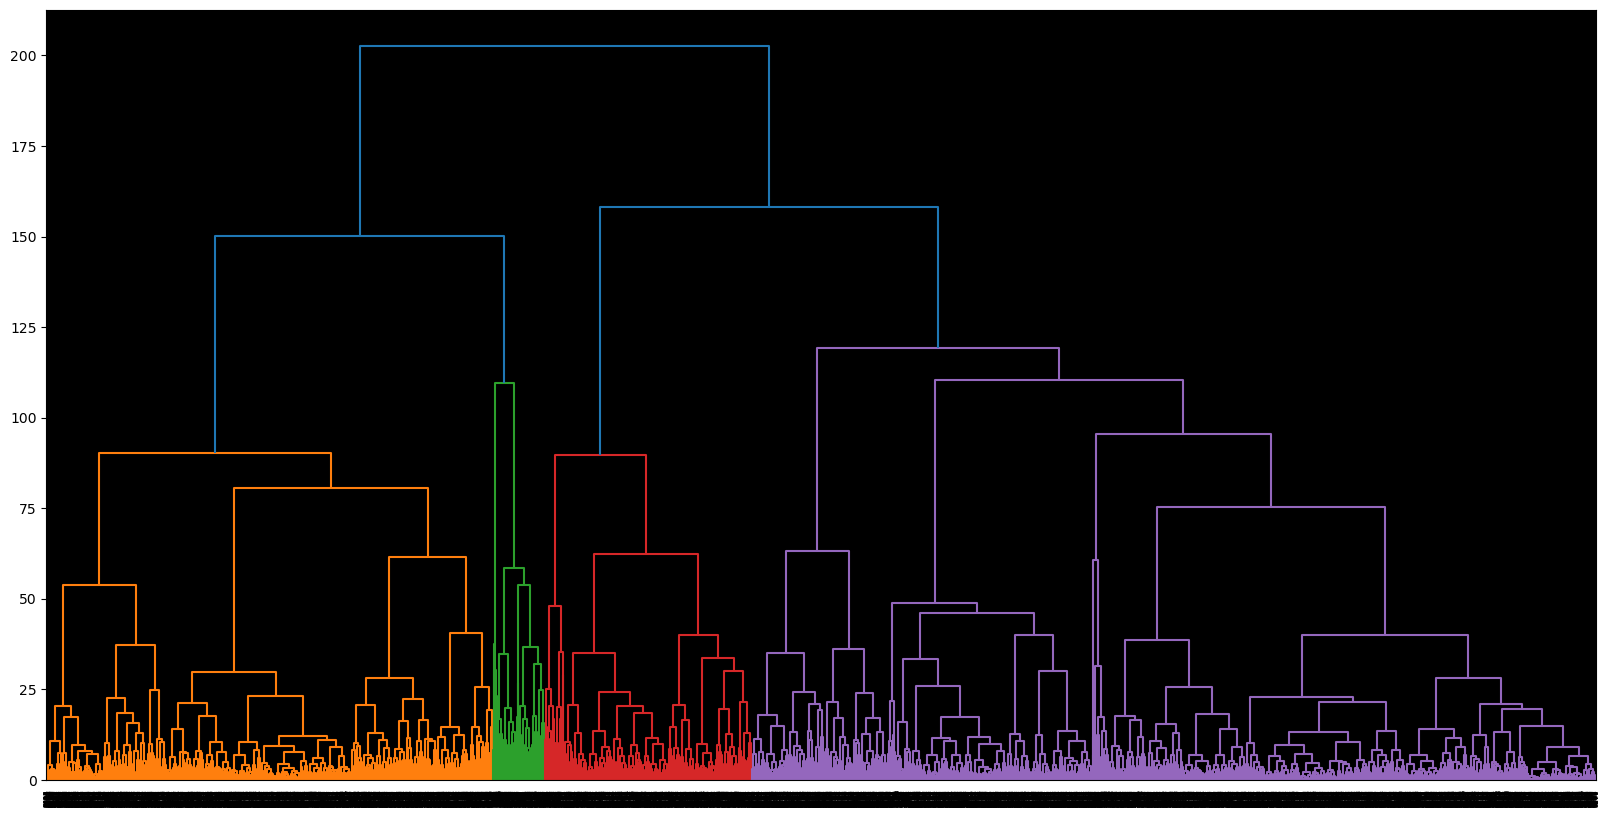

In [22]:
plt.figure(figsize=(20,10))
ax=plt.axes(facecolor='black')
dendrogram(linkage(pca_x,method='ward'))
plt.show()

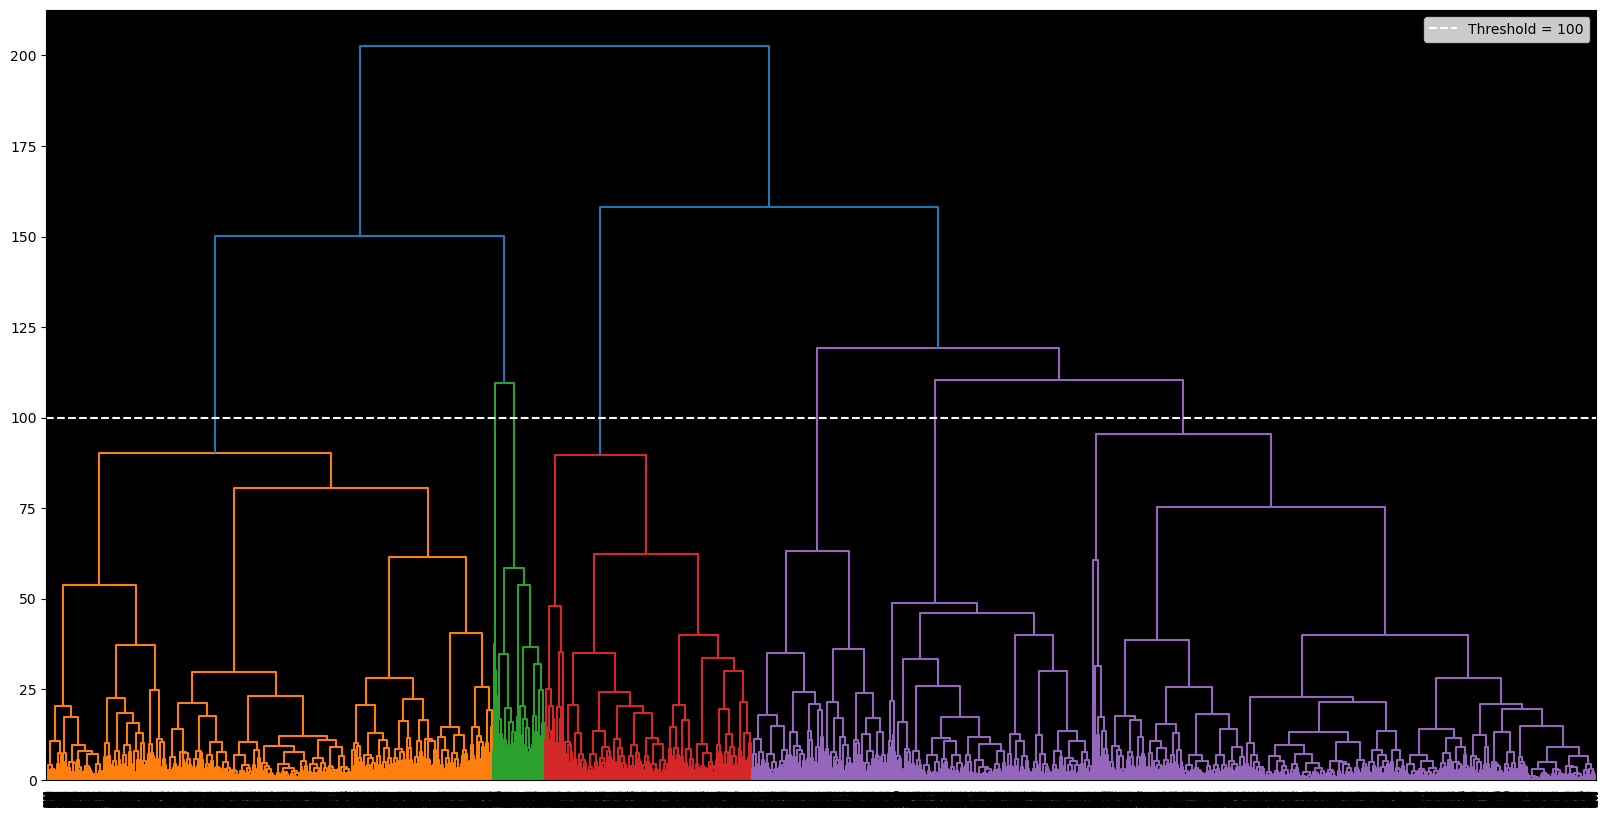

In [23]:
plt.figure(figsize=(20,10))
ax=plt.axes(facecolor='black')
dendrogram(linkage(pca_x,method='ward'))
#Draw a horizontal line at 100
thresholds = [100]
for threshold in thresholds:
    plt.axhline(y=threshold, color='white', linestyle='--',label=f'Threshold = {threshold}')
    
plt.legend()
plt.show()

### Agglomerative Clustering

- Agglomerative clustering is a hierarchical clustering technique used in unsupervised machine learning and data analysis to group similar data points into clusters based on their proximity or similarity.
- It is particularly useful when you want to explore data at different levels of granularity, as the dendrogram provides a hierarchical view of the clustering process. 

In [24]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster=AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward')
agg_cluster.fit(pca_x)

AgglomerativeClustering(affinity='euclidean', n_clusters=7)

In [25]:
labels=agg_cluster.fit_predict(pca_x)
labels

array([0, 2, 0, ..., 4, 4, 4], dtype=int64)

In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_x,labels,random_state=20)

0.16173398544339443

In [27]:
df['Cluster Data']=labels

In [28]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Data
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,5
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,3
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,5


In [29]:
df['Cluster Data'].unique()

array([0, 2, 5, 3, 1, 4, 6], dtype=int64)

## VISUALIZATIONS 

### Visualization of 'Cash Advance Trx' & 'Purchases Trx'

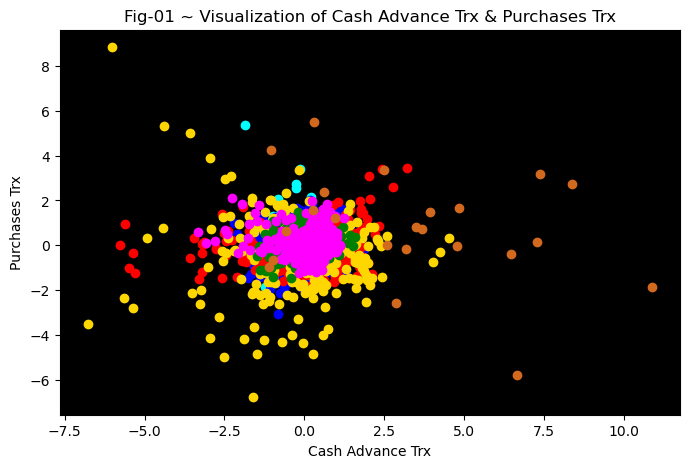

In [30]:
plt.figure(figsize=(8, 5))
ax=plt.axes(facecolor='black')
plt.scatter(pca_x[labels==0,10],pca_x[labels==0,11],color='cyan')
plt.scatter(pca_x[labels==1,10],pca_x[labels==1,11],color='blue')
plt.scatter(pca_x[labels==2,10],pca_x[labels==2,11],color='red')
plt.scatter(pca_x[labels==3,10],pca_x[labels==3,11],color='gold')
plt.scatter(pca_x[labels==4,10],pca_x[labels==4,11],color='green')
plt.scatter(pca_x[labels==5,10],pca_x[labels==5,11],color='magenta')
plt.scatter(pca_x[labels==6,10],pca_x[labels==6,11],color='chocolate')
plt.xlabel('Cash Advance Trx')
plt.ylabel('Purchases Trx')
plt.title('Fig-01 ~ Visualization of Cash Advance Trx & Purchases Trx')
plt.show()          

### Visualization of 'Balance & 'Balance Frequency'

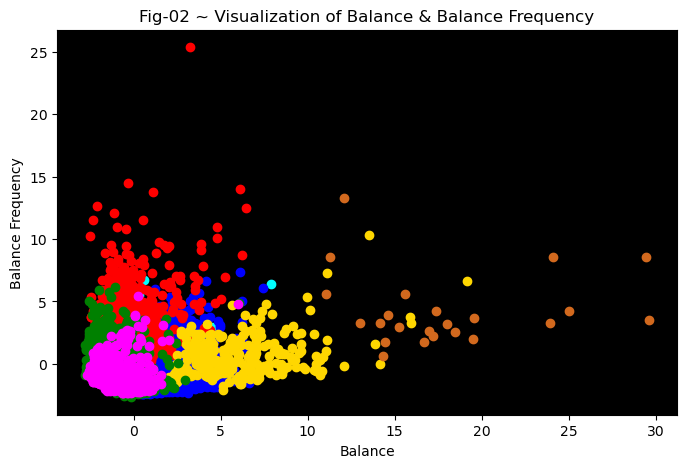

In [31]:
plt.figure(figsize=(8,5))
ax=plt.axes(facecolor='black')
plt.scatter(pca_x[labels==0,0],pca_x[labels==0,1],color='cyan')
plt.scatter(pca_x[labels==1,0],pca_x[labels==1,1],color='blue')
plt.scatter(pca_x[labels==2,0],pca_x[labels==2,1],color='red')
plt.scatter(pca_x[labels==3,0],pca_x[labels==3,1],color='gold')
plt.scatter(pca_x[labels==4,0],pca_x[labels==4,1],color='green')
plt.scatter(pca_x[labels==5,0],pca_x[labels==5,1],color='magenta')
plt.scatter(pca_x[labels==6,0],pca_x[labels==6,1],color='chocolate')
plt.xlabel('Balance')
plt.ylabel('Balance Frequency')
plt.title('Fig-02 ~ Visualization of Balance & Balance Frequency')
plt.show() 

### Visualization of 'Payments' & 'Minimum Payments'

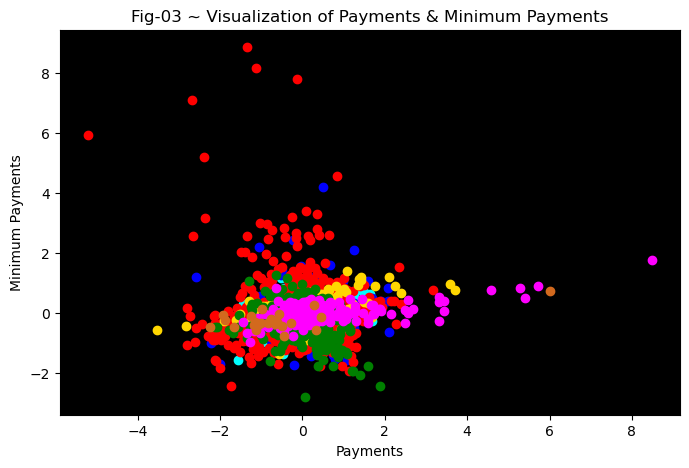

In [32]:
plt.figure(figsize=(8,5))
ax=plt.axes(facecolor='black')
plt.scatter(pca_x[labels==0,13],pca_x[labels==0,14],color='cyan')
plt.scatter(pca_x[labels==1,13],pca_x[labels==1,14],color='blue')
plt.scatter(pca_x[labels==2,13],pca_x[labels==2,14],color='red')
plt.scatter(pca_x[labels==3,13],pca_x[labels==3,14],color='gold')
plt.scatter(pca_x[labels==4,13],pca_x[labels==4,14],color='green')
plt.scatter(pca_x[labels==5,13],pca_x[labels==5,14],color='magenta')
plt.scatter(pca_x[labels==6,13],pca_x[labels==6,14],color='chocolate')
plt.xlabel('Payments')
plt.ylabel('Minimum Payments')
plt.title('Fig-03 ~ Visualization of Payments & Minimum Payments')
plt.show() 

### Visualization of 'Purchases' & 'Oneof Purchases'

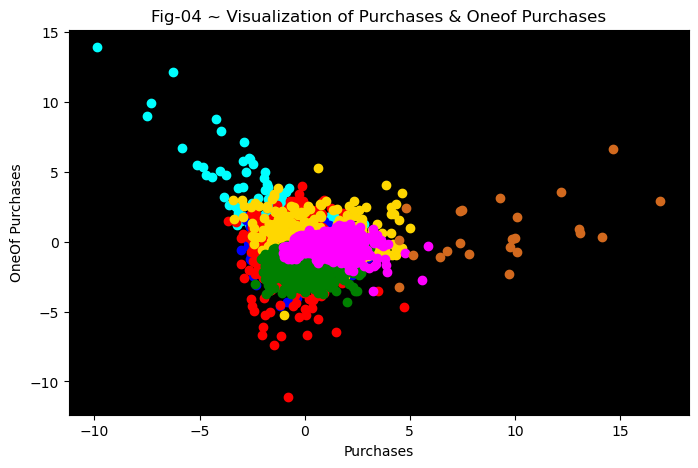

In [33]:
plt.figure(figsize=(8,5))
ax=plt.axes(facecolor='black')
plt.scatter(pca_x[labels==0,2],pca_x[labels==0,3],color='cyan')
plt.scatter(pca_x[labels==1,2],pca_x[labels==1,3],color='blue')
plt.scatter(pca_x[labels==2,2],pca_x[labels==2,3],color='red')
plt.scatter(pca_x[labels==3,2],pca_x[labels==3,3],color='gold')
plt.scatter(pca_x[labels==4,2],pca_x[labels==4,3],color='green')
plt.scatter(pca_x[labels==5,2],pca_x[labels==5,3],color='magenta')
plt.scatter(pca_x[labels==6,2],pca_x[labels==6,3],color='chocolate')
plt.xlabel('Purchases')
plt.ylabel('OneOf Purchases')
plt.title('Fig-04 ~ Visualization of Purchases & Oneof Purchases')
plt.show() 

### Visualization of 'Payments' & 'Purchases'

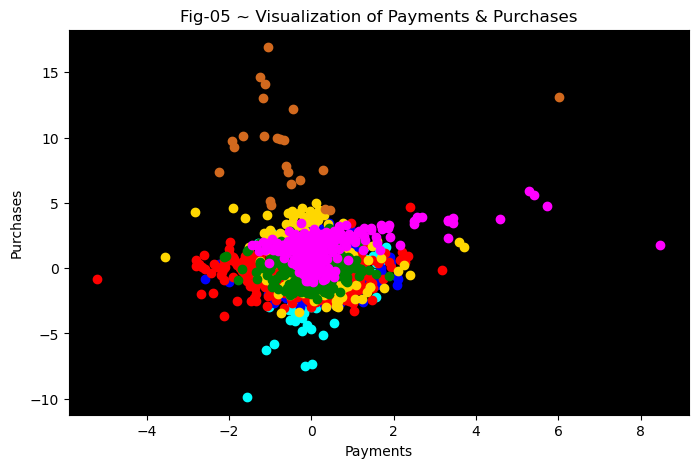

In [34]:
plt.figure(figsize=(8,5))
ax=plt.axes(facecolor='black')
plt.scatter(pca_x[labels==0,13],pca_x[labels==0,2],color='cyan')
plt.scatter(pca_x[labels==1,13],pca_x[labels==1,2],color='blue')
plt.scatter(pca_x[labels==2,13],pca_x[labels==2,2],color='red')
plt.scatter(pca_x[labels==3,13],pca_x[labels==3,2],color='gold')
plt.scatter(pca_x[labels==4,13],pca_x[labels==4,2],color='green')
plt.scatter(pca_x[labels==5,13],pca_x[labels==5,2],color='magenta')
plt.scatter(pca_x[labels==6,13],pca_x[labels==6,2],color='chocolate')
plt.xlabel('Payments')
plt.ylabel('Purchases')
plt.title('Fig-05 ~ Visualization of Payments & Purchases')
plt.show() 

### Visualization of 'Credit Limit' & 'One-of Purchases'

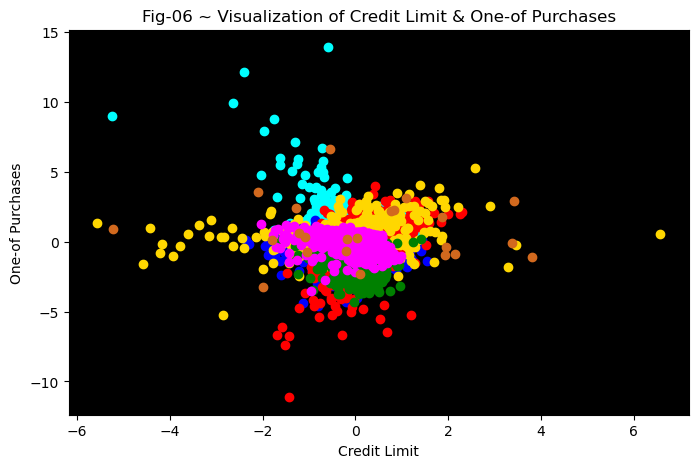

In [35]:
plt.figure(figsize=(8,5))
ax=plt.axes(facecolor='black')
plt.scatter(pca_x[labels==0,12],pca_x[labels==0,3],color='cyan')
plt.scatter(pca_x[labels==1,12],pca_x[labels==1,3],color='blue')
plt.scatter(pca_x[labels==2,12],pca_x[labels==2,3],color='red')
plt.scatter(pca_x[labels==3,12],pca_x[labels==3,3],color='gold')
plt.scatter(pca_x[labels==4,12],pca_x[labels==4,3],color='green')
plt.scatter(pca_x[labels==5,12],pca_x[labels==5,3],color='magenta')
plt.scatter(pca_x[labels==6,12],pca_x[labels==6,3],color='chocolate')

plt.xlabel('Credit Limit')
plt.ylabel('One-of Purchases')
plt.title('Fig-06 ~ Visualization of Credit Limit & One-of Purchases')
plt.show()

### Visualization of 'Cash Advance' & 'Cash Advance Frequency'

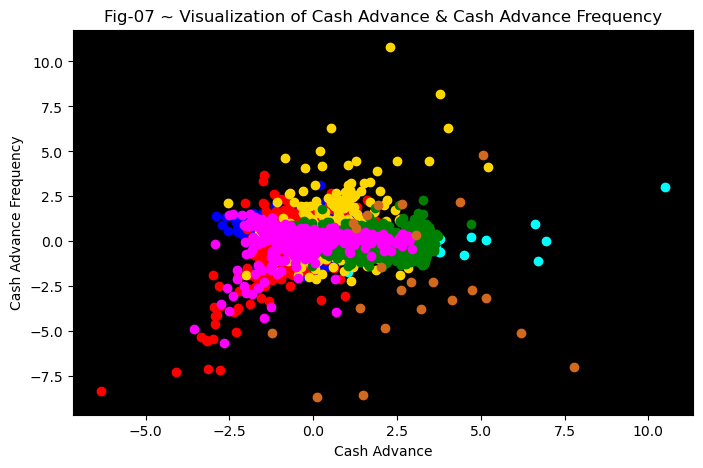

In [36]:
plt.figure(figsize=(8,5))
ax=plt.axes(facecolor='black')
plt.scatter(pca_x[labels==0,5],pca_x[labels==0,9],color='cyan')
plt.scatter(pca_x[labels==1,5],pca_x[labels==1,9],color='blue')
plt.scatter(pca_x[labels==2,5],pca_x[labels==2,9],color='red')
plt.scatter(pca_x[labels==3,5],pca_x[labels==3,9],color='gold')
plt.scatter(pca_x[labels==4,5],pca_x[labels==4,9],color='green')
plt.scatter(pca_x[labels==5,5],pca_x[labels==5,9],color='magenta')
plt.scatter(pca_x[labels==6,5],pca_x[labels==6,9],color='chocolate')

plt.xlabel('Cash Advance')
plt.ylabel('Cash Advance Frequency')
plt.title('Fig-07 ~ Visualization of Cash Advance & Cash Advance Frequency')
plt.show()

### Visualization of 'Balance' & 'Purchases'

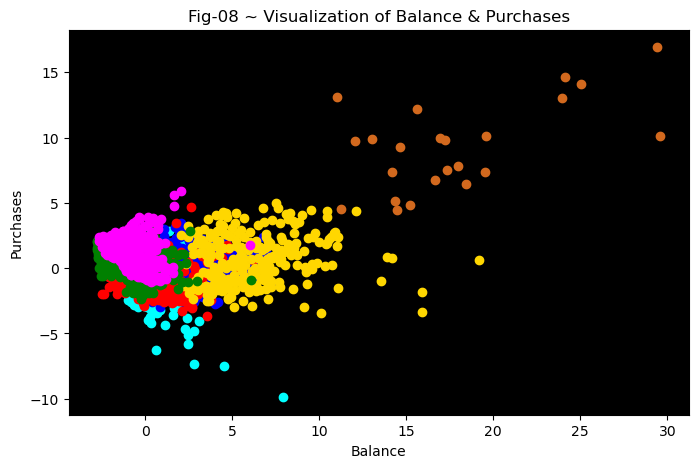

In [37]:
plt.figure(figsize=(8,5))
ax=plt.axes(facecolor='black')
plt.scatter(pca_x[labels==0,0],pca_x[labels==0,2],color='cyan')
plt.scatter(pca_x[labels==1,0],pca_x[labels==1,2],color='blue')
plt.scatter(pca_x[labels==2,0],pca_x[labels==2,2],color='red')
plt.scatter(pca_x[labels==3,0],pca_x[labels==3,2],color='gold')
plt.scatter(pca_x[labels==4,0],pca_x[labels==4,2],color='green')
plt.scatter(pca_x[labels==5,0],pca_x[labels==5,2],color='magenta')
plt.scatter(pca_x[labels==6,0],pca_x[labels==6,2],color='chocolate')

plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Fig-08 ~ Visualization of Balance & Purchases')
plt.show()

In [38]:
df.to_csv('Clustered Insurance Market Segmentation.csv')

## Model Prediction (Using Supervised ML Algorithms)

In [39]:
new_df=df.copy()

In [40]:
new_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Data
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,5
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [41]:
#Encoding
new_df['CUST_ID']=new_df['CUST_ID'].astype('category')
new_df['CUST_ID']=new_df['CUST_ID'].cat.codes

In [42]:
new_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Data
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,5
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [43]:
x=new_df.drop(['Cluster Data'],axis=1)

In [44]:
y=new_df['Cluster Data']

### Train-Test Split method

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6712, 18), (2238, 18), (6712,), (2238,))

### Random Forest Algorithm

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
y_train_pred=rf_model.predict(x_train)
y_test_pred=rf_model.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print('TRAIN ACCURACY:',accuracy_score(y_train,y_train_pred))
print()
print('TEST ACCURACY:',accuracy_score(y_test,y_test_pred))

TRAIN ACCURACY: 1.0

TEST ACCURACY: 0.9235924932975871


In [51]:
#Applying cross val score to improve accuracy
from sklearn.model_selection import cross_val_score
print('TRAIN MODIFIED ACCURACY:',cross_val_score(rf_model,x_train,y_train,cv=10).mean())
print()
print('TEST MODIFIED ACCURACY:',cross_val_score(rf_model,x_test,y_test,cv=10).mean())

TRAIN MODIFIED ACCURACY: 0.9202950908381237

TEST MODIFIED ACCURACY: 0.8941323670723896


### Gradient Boosting Algorithm 

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [53]:
y_train_pred=gb_model.predict(x_train)
y_test_pred=gb_model.predict(x_test)

In [54]:
print('TRAIN ACCURACY:',accuracy_score(y_train,y_train_pred))
print()
print('TEST ACCURACY:',accuracy_score(y_test,y_test_pred))

TRAIN ACCURACY: 0.9670738974970202

TEST ACCURACY: 0.9213583556747096


## CONCLUSION

- We have successfully modelled the Market segmentation data using Hierarchical algorithm which involves a combination of data preprocessing, thoughtful selection of k, iterative optimization, cluster interpretation, and evaluation.
- We have handled the missing values,done features scaling, & also used PCA to improve the algorithm's efficiency and performance.
- Techniques such as the Dendrogram & Linkage method are used to select the appropriate number of clusters(k).
- Getting a silhouette score of 0.16 is positive, which is generally a good sign i.e., on average, the data points within each cluster are closer to each other than they are to data points in neighboring clusters. 
- Visualization tools like scatter plots are used to provide a clearer understanding of the clusters 'composition'.
- We have also predicted a model using Supervised ML algorithms, getting good accuracy score(>90%) in both algorithms.
- Overally, the methodology demonstrates a strong analytical process & combination of techniques employed should provide valuable insights into the market segmentation data.